In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (10,10)
%matplotlib inline

In [2]:
a = 100.7 # setting global value

Time Taken in Seconds:  2.936114549636841
KS Statistic and p-value:  KstestResult(statistic=0.0509259247457976, pvalue=0.010785353839830814)


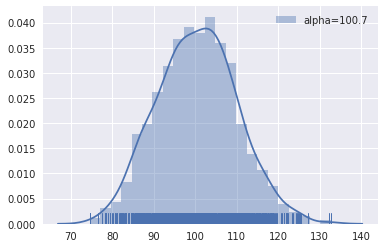

In [3]:
start = time.time()
rvs = np.random.gamma(a,1,1000)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()
end = time.time()
print("Time Taken in Seconds: ", end-start)
print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))

# $\alpha$ > 1

## 1. Fishman 1996

In [4]:
def fishman(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    while count != 1000:
        tot_count += 1
        y = np.random.exponential(scale=1)
        u = np.random.uniform(0,1)
        if np.log(u) < (a-1)*(1-y+np.log(y)):
            x = a*y
            rvs.append(x)
            count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.9048072346501665
Time Taken in Seconds:  0.11799263954162598
KS Statistic and p-value:  KstestResult(statistic=0.03346858885750659, pvalue=0.20814441944087303)


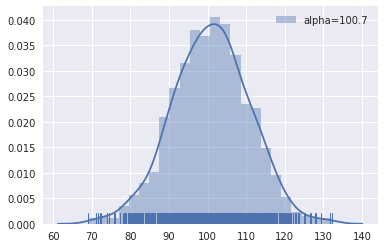

In [5]:
rvs = fishman(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 2. Cheng 1977

In [6]:
def cheng1(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    alpha = 1/np.sqrt(2*a-1)
    b = a - np.log(4)
    c = a + 1/alpha
    
    while count != 1000:
        tot_count += 1
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        v = alpha*np.log(u1/(1-u1))
        x = a*np.exp(v)
        
        if b+c*v-x >= np.log(np.power(u1,2)*u2):
            rvs.append(x)
            count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.10394265232974909
Time Taken in Seconds:  0.017778873443603516
KS Statistic and p-value:  KstestResult(statistic=0.05725812009096498, pvalue=0.002724771872042675)


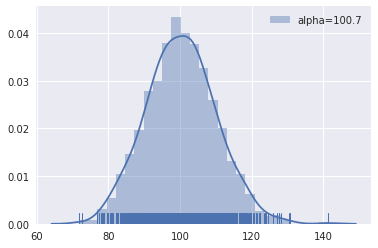

In [9]:
rvs = cheng1(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

In [10]:
def cheng2(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    alpha = 1/np.sqrt(2*a-1)
    b = a - np.log(4)
    c = a + 1/alpha
    
    while count != 1000:
        tot_count += 1
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        v = alpha*np.log(u1/(1-u1))
        x = a*np.exp(v)
        z = np.power(u1,2)*u2
        r = b+c*v-x
        
        if r+2.5040774-4.5*z >= 0:
            rvs.append(x)
            count += 1
        elif r >= np.log(z):
            rvs.append(x)
            count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.11894273127753308
Time Taken in Seconds:  0.02194690704345703
KS Statistic and p-value:  KstestResult(statistic=0.04057636373205631, pvalue=0.07227546065534174)


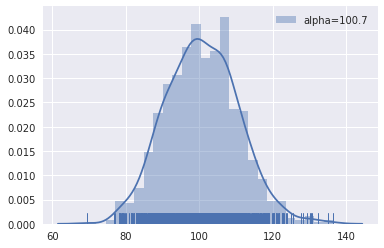

In [12]:
rvs = cheng2(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 3. Marsaglia 1977

In [14]:
def marsa(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    s = 1/(3*np.sqrt(a))
    x_0 = s - np.sqrt(3)
    z_0 = 1 - s*np.sqrt(3)
    
    while count != 1000:
        tot_count += 1
        x = np.random.normal(0,1)
        z = s*x + 1 - np.power(s,2)
        
        if z<=0:
            x = np.random.normal(0,1)
            z = s*x + 1 - np.power(s,2)
            
        t = 1 - z_0/z
        e = np.random.exponential(1)
        if 0.5*np.power(x,2) + e > 0.5*np.power(x_0,2) + a*(np.power(z,3) - np.power(z_0,3)) + (3*a-1)*(t + 0.5*np.power(t,2) + (1/3)*(np.power(t,3))):
            rvs.append(a*np.power(z,3))
            count += 1
        elif 0.5*np.power(x,2) + e > 0.5*np.power(x_0,2) + a*(np.power(z,3) - np.power(z_0,3)) + (3*a-1)*np.log(z/z_0) :
            rvs.append(x)
            count += 1
        
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.9522513488993936
Time Taken in Seconds:  1.0133695602416992
KS Statistic and p-value:  KstestResult(statistic=0.9483138769547645, pvalue=0.0)


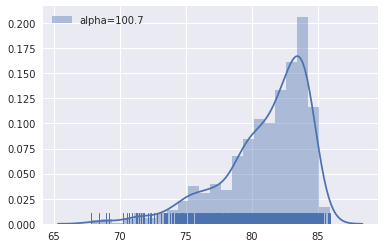

In [15]:
rvs = marsa(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 4. Atkinson 1977

In [ ]:
def atkinson(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    alpha = a
    t = alpha-1
    mu = (np.sqrt(1+4*t) - 1)/(2*t)
    k = np.power(t*np.power(1-mu, t) + 1/mu*np.exp(-mu*t), -1)
    r = k*t*np.power((1-mu), t)
    
    while count != 1000:
        tot_count += 1
        
        u = np.random.uniform(0,1)
        e = np.random.exponential(1)
        
        if u>r:
            x = -1/mu*(np.log((mu*(1-u))/k))
            if (t*np.log(t/((1-mu)*x)) + (1-mu)*x - t) <= e:
                rvs.append(x)
                count += 1
            else:
                continue
                
        x = u/k*(np.power(1-mu, -t))
        if t*np.log(2)-x > e:
            continue
        elif (t*np.log(t) - t - t*np.log(x) + x) <= e:
            rvs.append(x)
            count += 1
        else :
            continue
        
        x = -1/mu*(np.log((mu*(1-u))/k))
        if (t*np.log(t/((1-mu)*x)) + (1-mu)*x - t) <= e:
            rvs.append(x)
            count += 1
        else:
            continue
        
            
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

In [ ]:
rvs = atkinson(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 5. Tadikammala 1978

In [16]:
def tadik(a, b=1):
    start = time.time()
    
    def t_x(x,a,theta):
        v = np.power(np.absolute((theta-1)*x/(theta*(a-1))),a-1)
        w = np.exp(-x + (np.absolute(x-a+1) + (a-1)*(theta+1))/theta)
        val = v*w
        return val
    
    count = 0
    tot_count = 0
    rvs = []
    mean = a-1
    theta = (1+np.sqrt(4*a-3))/2
    
    while count != 1000:
        tot_count += 1
        x = np.random.laplace(mean, theta)
        if x<0:
            continue
        u = np.random.uniform(0,1)
        if u <= t_x(x,a,theta):
            rvs.append(x)
            count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.26090169992609014
Time Taken in Seconds:  0.029543638229370117
KS Statistic and p-value:  KstestResult(statistic=0.04242652296180455, pvalue=0.053087688373400166)


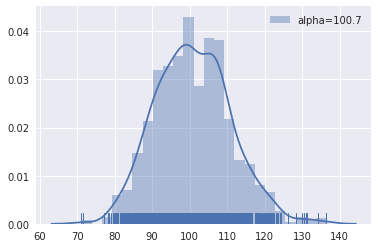

In [18]:
rvs = tadik(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 6. Cheng and Feast based on Kinderman and Monahan 1979

In [19]:
def gkm(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    alpha = a
    a = alpha - 1
    b = (alpha - 1/(6*alpha))/a
    c = 2/a
    d = c + 2
    
    while count != 1000:
        tot_count += 1
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        w = b*u1/u2
        
        if c*np.log(u2)-np.log(w)+w-1 >= 0:
            continue
        
        elif c*u2-d+w+1/w <= 0:
            rvs.append(a*w)
            count += 1
            continue
        rvs.append(a*w)
        count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.8769079271294928
Time Taken in Seconds:  0.09296107292175293
KS Statistic and p-value:  KstestResult(statistic=0.02652374164765789, pvalue=0.4812049359647268)


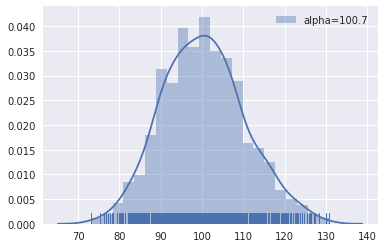

In [21]:
rvs = gkm(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

### Cheng and Feast Extended Hiashi Tanizaki (2008)

In [ ]:
def ht(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    alpha = a
    if alpha <= 0.4:
        n = 1/alpha
    elif alpha > 0.4 and alpha <= 4.0:
        n = 1/alpha + 1/(3.6*alpha)*(alpha-0.4)
    else:
        n = 1/np.sqrt(alpha)
    b1 = alpha - 1/n
    b2 = alpha + 1/n
    
    if alpha <= 0.4:
        c1 = 0
    elif alpha > 0.4:
        c1 = b2*(np.log(b1)-1)/2
    
    c2 = b2*(np.log(b2)-1)/2
    
    while count != 1000:
        tot_count += 1
        v1 = np.random.uniform(0,1)
        v2 = np.random.uniform(0,1)
        w1 = c1 + np.log(v1)
        w2 = c2 + np.log(v2)
        y = n*(b1*w2 - b2*w1)
        
        if y<0:
            continue 
        
        if np.log(y) >= n*(w2-w1):
            rvs.append(np.exp(n*(w2-w1)))
            count += 1
        else:
            continue
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

In [ ]:
rvs = ht(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 7. Scmeiser and Lal 1980 Squeeze methods

In [ ]:
def s_l(a, b=1):
    start = time.time()
    count = 0
    tot_count = 0
    rvs = []
    
    
    x3 = a-1
    d = np.sqrt(x3)
    x1, x2, f1, f2 = 0
    lambda_l = 1
    
    if d < x3:
        x2 = x3-d
        x1 = x2*(1 - 1/d)
        lambda_l = 1 - x3/x1
        f1 = f(x1)
        f2 = f(x2)
    else:
        x4 = x3 + d
        x5 = x4*(1+1/D)
        lambda_r = 1 - x3/x5
        f4 = f(x4)
        f5 = f(x5)

        p1 = f2*(x3-x2)
        p2 = f4*(x4-x3) + p1
        p3 = f1*(x2-x1) + p2
        p4 = f5*(x5-x4) + p3
        p5 = (1-f2)*(x3-x2) + p4
        p6 = (1-f4)*(x4-x3) + p5
        p7 = (f2-f1)*(x2-x1)/2 + p6
        p8 = (f4-f5)*(x5-x4)/2 + p7
        p9 = -f1/lambda_l + p8
        p10 = f5/lambda_r + p9
    
    x4 = x3 + d
    x5 = x4*(1+1/D)
    lambda_r = 1 - x3/x5
    f4 = f(x4)
    f5 = f(x5)

    p1 = f2*(x3-x2)
    p2 = f4*(x4-x3) + p1
    p3 = f1*(x2-x1) + p2
    p4 = f5*(x5-x4) + p3
    p5 = (1-f2)*(x3-x2) + p4
    p6 = (1-f4)*(x4-x3) + p5
    p7 = (f2-f1)*(x2-x1)/2 + p6
    p8 = (f4-f5)*(x5-x4)/2 + p7
    p9 = -f1/lambda_l + p8
    p10 = f5/lambda_r + p9

    
    
    while count != 1000:
        tot_count += 1
        
        u = np.random.uniform(0,1)
        u = u*p10
        
        if u > p4:
            
        
        w = b*u1/u2
        
        if c*np.log(u2)-np.log(w)+w-1 >= 0:
            continue
        
        elif c*u2-d+w+1/w <= 0:
            rvs.append(a*w)
            count += 1
            continue
        rvs.append(a*w)
        count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

## 8. Marsaglia and Tsang (2000) 
### good for $\alpha$>1

In [22]:
def mars_tsang(a, b=1):
    start = time.time()
    a = a
    d = a - 1/3
    c = 1/np.sqrt(9*d)
    count = 0
    tot_count = 0
    rvs = []
    while count != 1000:
        tot_count += 1
        z = np.random.normal(0,1)
        u = np.random.uniform(0,1)
        v = np.power(1+c*z, 3)
        if z > -1/c and np.log(u) < (0.5*np.power(z,2)+ d - d*v + d*np.log(v)):
            rvs.append(d*v)
            count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.0009990009990009652
Time Taken in Seconds:  0.023402690887451172
KS Statistic and p-value:  KstestResult(statistic=0.04919033635951919, pvalue=0.015289717060273933)


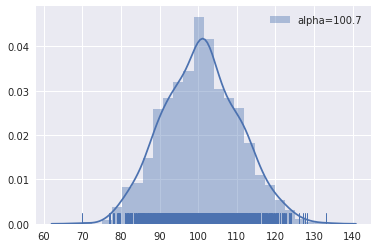

In [27]:
rvs = mars_tsang(a, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 2. Berman 1971

In [53]:
def berman(a, b=1):
    start = time.time()
    
    m = int(a)
    q = a - m
    
    count = 0
    tot_count = 0
    rvs = []
    while count != 1000:
        tot_count += 1
        z = -np.log(np.prod(np.random.uniform(0,1, size=(1,m))))
        w = np.random.beta(q,1-q)
        y = np.log(np.random.uniform(0,1))
        x = z+w*y
        rvs.append(x)
        count += 1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    return rvs

Proportion of Rejection:  0.0
Time Taken in Seconds:  0.025307655334472656
KS Statistic and p-value:  KstestResult(statistic=0.10768550698675072, pvalue=1.4913248413961355e-10)


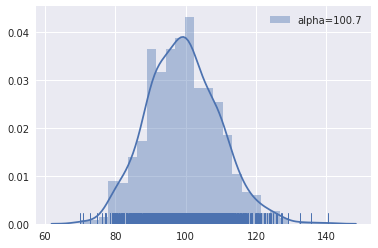

In [59]:
rvs = berman(100.7, 1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 2. Ahrens and Dieter (1974)
0<$\alpha$<1

In [31]:
def ahrens_dieter(a, b=1):                    
    
    start = time.time()
    
    def g(x, alpha):
        k = alpha*np.exp(1) / (np.exp(1) + alpha)
        if x >= 1:
            return  k*np.exp(-x)
        else:
            return k*np.power(x, alpha-1)
    
    def generate_g(alpha):   # 0<alpha<1
        c = np.exp(1)/(np.exp(1) + alpha)
        u = np.random.uniform(0,1)
        if u <= c:
            return np.power(u/c, 1/alpha)
        else:
            return np.log(c*alpha/(c*alpha/np.exp(1) - u + c))
    
    rvs = []
    count = 0
    tot_count = 0
    alpha = a - int(a)    # fractional_part
    
    while count!=1000:
        tot_count += 1
        exp_sum = np.sum(np.random.exponential(scale=1.0, size=(1, int(a)))) #exponential rvs for integral  a
        y = generate_g(alpha)
        u = np.random.uniform(0,1)
        k = alpha*np.exp(1) / (np.exp(1) + alpha)
        c = 1/(k*sp.special.gamma(alpha))
                         
        if u <= sp.stats.gamma.pdf(y, a=alpha)/(c*g(y, alpha)):
            x = y + exp_sum
            rvs.append(x)
            count+=1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

Proportion of Rejection:  0.28774928774928776
Time Taken in Seconds:  0.357250452041626
KS Statistic and p-value:  KstestResult(statistic=0.044355818550783965, pvalue=0.03792433144105378)


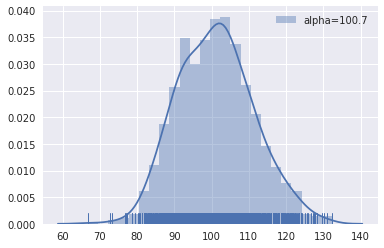

In [34]:
rvs = ahrens_dieter(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 3. Best (1983)
### 0<$\alpha$<1

In [35]:
def best(a, b=1):                    
    
    start = time.time()
    
    def r(x, alpha):
        d = 0.07 + 0.75*np.sqrt(1-alpha)
        b = 1 + np.exp(-d)*alpha/d
        
        if 0<x<d:
            return alpha*np.power(x, alpha-1)/(b*np.power(d,alpha))
        else:
            return (alpha/(b*d))*np.exp(-x)
    
    def generate_r(alpha):   # 0<alpha<1
        d = 0.07 + 0.75*np.sqrt(1-alpha)
        b = 1 + np.exp(-d)*alpha/d
        c = 1/b
        u = np.random.uniform(0,1)
        
        if u <= c:
            return np.power(u*b*np.power(d,alpha), 1/alpha)
        else :
            return -np.log(b*d*(1-u)/alpha)
    
    rvs = []
    count = 0
    tot_count = 0
    alpha = a - int(a)    # fractional_part
    
    while count!=1000:
        tot_count += 1
        exp_sum = np.sum(np.random.exponential(scale=1.0, size=(1, int(a)))) #exponential rvs for integral  a
        y = generate_r(alpha)
        u = np.random.uniform(0,1)
        d = 0.07 + 0.75*np.sqrt(1-alpha)
        k = alpha*np.exp(-d)/(b*d)
        c = 1/(k*sp.special.gamma(alpha))
                         
        if u <= sp.stats.gamma.pdf(y, a=alpha)/(c*r(y, alpha)):
            x = y + exp_sum
            rvs.append(x)
            count+=1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

Proportion of Rejection:  0.020568070519098924
Time Taken in Seconds:  0.2385845184326172
KS Statistic and p-value:  KstestResult(statistic=0.046038637142255034, pvalue=0.02793904035066541)


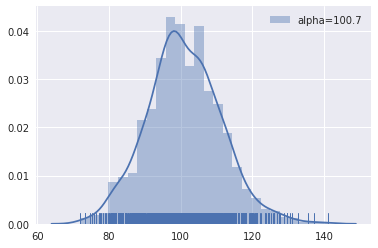

In [37]:
rvs = best(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

# 4. Kundu (2007)
## 4.1 kundu-1

In [38]:
def kundu1(a,b=1):
    start = time.time()
    
    rvs = []
    count = 0
    tot_count = 0
    alpha = a - int(a)    # fractional_part
    
    while count!=1000:
        tot_count += 1
        exp_sum = np.sum(np.random.exponential(scale=1.0, size=(1, int(a)))) #exponential rvs for integral  a
        u = np.random.uniform(0,1)
        x = -2*np.log(1 - np.power(u,1/alpha))
        v = np.random.uniform(0,1)
        
        if v <= np.power(x,alpha-1)*np.exp(-0.5*x)/(np.power(2, alpha-1)*(np.power(1-np.exp(-0.5*x), alpha-1))):
            x = x + exp_sum
            rvs.append(x)
            count+=1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

Proportion of Rejection:  0.43470887507066136
Time Taken in Seconds:  0.1358029842376709
KS Statistic and p-value:  KstestResult(statistic=0.03424513097019766, pvalue=0.18726385584323735)


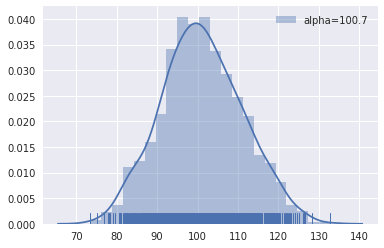

In [40]:
rvs = kundu1(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 4.2 kundu-2

In [41]:
def kundu2(a,b=1):
    start = time.time()
    
    rvs = []
    count = 0
    tot_count = 0
    alpha = a - int(a)    # fractional_part
    p = np.power(1-np.exp(-0.5), alpha)/(np.power(1-np.exp(-0.5), alpha) + alpha*np.exp(-1)/np.power(2,alpha))
    q = np.power(1-np.exp(-0.5), alpha) + alpha*np.exp(-1)/np.power(2,alpha)
    
    while count != 1000:
        tot_count += 1
        exp_sum = np.sum(np.random.exponential(scale=1.0, size=(1, int(a)))) #exponential rvs for integral  a
        u = np.random.uniform(0,1)
        if u <= p:
            x = -2*np.log(1 - np.power((u*b),1/alpha))
        else:
            x = -np.log(np.power(2,alpha)*b/(alpha*(1-u)))
         
        v = np.random.uniform(0,1)
        if x<=1:
            if v<=np.power(x,alpha-1)*np.exp(-0.5*x)/(np.power(2,alpha-1)*np.power(1-np.exp(-0.5*x), alpha-1)):
                x = x + exp_sum
                rvs.append(x)
                count += 1
        else:
            if v<=np.power(x, alpha-1):
                x = x + exp_sum
                rvs.append(x)
                count += 1
     
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

/home/robsr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in power


Proportion of Rejection:  0.3614303959131545
Time Taken in Seconds:  0.13182377815246582
KS Statistic and p-value:  KstestResult(statistic=0.04610809902667179, pvalue=0.027582127023309866)


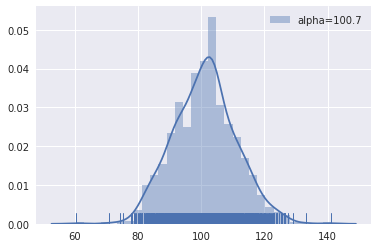

In [43]:
rvs = kundu2(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 4.3 kundu3

In [44]:
def kundu3(a,b=1):
    start = time.time()
    
    rvs = []
    count = 0
    tot_count = 0
    alpha = a - int(a)    # fractional_part
    d = 1.0334 - 0.0766*np.exp(2.2942*alpha)
    p = np.power(2*(1 - np.exp(-0.5*d)), alpha)
    q = alpha*np.power(d, alpha-1)*np.exp(-d)
    c = p + q
    
    while count != 1000:
        tot_count += 1
        exp_sum = np.sum(np.random.exponential(scale=1.0, size=(1, int(a)))) #exponential rvs for integral  a
        u = np.random.uniform(0,1)
        if u <= p/(p+q):
            x = -2*np.log(1 - np.power(c*u,1/alpha)/2)
        else:
            x = -np.log(c*(1-u)/(alpha*np.power(d, alpha-1)))
         
        v = np.random.uniform(0,1)
        if x<=d:
            if v<=np.power(x,alpha-1)*np.exp(-0.5*x)/(np.power(2,alpha-1)*np.power(1-np.exp(-0.5*x), alpha-1)):
                x = x + exp_sum
                rvs.append(x)
                count += 1
        else:
            if v<=np.power(d/x, 1-alpha):
                x = x + exp_sum
                rvs.append(x)
                count += 1
     
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

Proportion of Rejection:  0.14748508098891733
Time Taken in Seconds:  0.06287169456481934
KS Statistic and p-value:  KstestResult(statistic=0.06598159960759145, pvalue=0.0003144947658482167)


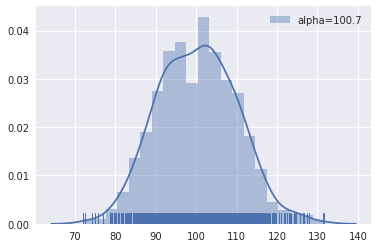

In [46]:
rvs = kundu3(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## 5 Ratio of Uniform Method
$\alpha$ > 1 

In [47]:
def ROU(a,b=1):
    start = time.time()
    
    rvs = []
    count = 0
    tot_count = 0
    
    while count!=1000:
        tot_count += 1
        b = np.power((a-1)/np.exp(1), (a-1)/2)
        c = 0
        d = np.power((a+1)/np.exp(1), (a+1)/2)
        
        u = np.random.uniform(0,b)
        v = np.random.uniform(c,d)
        f_vu = np.sqrt(np.power(v/u, a-1)*np.exp(-v/u))
        
        if u <= f_vu:
            rvs.append(v/u)
            count+=1
    
    end = time.time()
    print('Proportion of Rejection: ', 1 - count/tot_count)
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

/home/robsr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()
/home/robsr/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Proportion of Rejection:  0.8745137407453883
Time Taken in Seconds:  0.2261056900024414
KS Statistic and p-value:  KstestResult(statistic=0.041731018955188715, pvalue=0.05971238517367938)


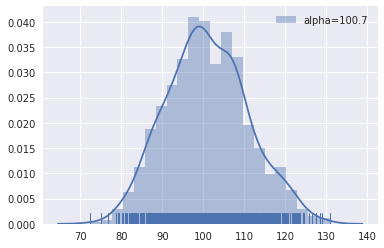

In [52]:
rvs = ROU(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()

## Chuhuna Lu (Purdue) 2015

In [ ]:
def clu(a,b=1):
    start = time.time()
    
    def h(alpha,z):
        return (1/sp.special.gamma(alpha+1))*np.exp(-z-np.exp(-z/alpha))
    
    def n(alpha,z):
        lamda = 1/alpha - 1
        c = 1/sp.special.gamma(alpha+1)
        w = alpha/(np.exp(1)*(1-alpha))
        if z>=0:
            return c*np.exp(-z)
        else:
            return c*w*lamda*np.exp(lamda*z)
    
    rvs = []
    count = 0
    tot_count = 0
    
    lamda = 1/a - 1
    w = a/(np.exp(1)*(1-a))
    r = 1/(1+w)
    
    count_list=[]
    while count!=1000:
        tot_count += 1
        count2=0
        while True:
            u = np.random.uniform(0,1)
            if u <= r:
                z = -np.log(u/r)
            else:
                z = np.log(np.random.uniform(0,1))/lamda
            count2 += 1
            if h(a,z)/n(a,z) > np.random.uniform(0,1):
                Z = z
                break
        count_list.append(count2)
        rvs.append(np.exp(-Z/a))
        count+=1

    end = time.time()
    print('Proportion of Rejection: ', 1 - np.sum(count_list)/np.sum(np.array(count_list)+1))
    print("Time Taken in Seconds: ", end-start)
    print("KS Statistic and p-value: ", sp.stats.kstest(rvs,'gamma',(a,1)))
    
    return rvs

In [ ]:
rvs = clu(a, b=1)
sns.distplot(rvs, rug=True, label='alpha='+str(a))
plt.legend()